# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** RISQIE NUR SALSABILA
- **Email:** mc283d5x0548@student.devacademy.id
- **ID Dicoding:** mc283d5x0548

## Menentukan Pertanyaan Bisnis

- Bagaimana tren volume pesanan e-commerce di Brasil berubah dari waktu ke waktu? apakah terdapat pola musiman?
- Bagaimana hubungan antara jumlah pembayaran dan rating ulasan pelanggan dalam e-commerce?

## Import Semua Packages/Library yang Digunakan

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


## Data Wrangling

### Gathering Data

In [29]:
# Load semua dataset
customers = pd.read_csv("customers_dataset.csv")
geolocation = pd.read_csv("geolocation_dataset.csv")
order_items = pd.read_csv("order_items_dataset.csv")
order_payments = pd.read_csv("order_payments_dataset.csv")
order_reviews = pd.read_csv("order_reviews_dataset.csv")
orders = pd.read_csv("orders_dataset.csv")
product_category = pd.read_csv("product_category_name_translation.csv")
products = pd.read_csv("products_dataset.csv")
sellers = pd.read_csv("sellers_dataset.csv")


In [30]:
# Gabungkan data
df = order_items.merge(products, on="product_id", how="left")
df = df.merge(orders, on="order_id", how="left")
df = df.merge(order_payments, on="order_id", how="left")
df = df.merge(order_reviews, on="order_id", how="left")
df = df.merge(product_category, on="product_category_name", how="left")

# Ubah format tanggal
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])


**Insight:**
  - Data dari berbagai sumber berhasil digabungkan menjadi satu dataframe utama.
  - Format tanggal pada `order_purchase_timestamp` dikonversi agar bisa digunakan dalam analisis waktu.

### Assessing Data

In [31]:
# Cek informasi dataset
df.info()

# Cek data yang hilang
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118310 entries, 0 to 118309
Data columns (total 33 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118310 non-null  object        
 1   order_item_id                  118310 non-null  int64         
 2   product_id                     118310 non-null  object        
 3   seller_id                      118310 non-null  object        
 4   shipping_limit_date            118310 non-null  object        
 5   price                          118310 non-null  float64       
 6   freight_value                  118310 non-null  float64       
 7   product_category_name          116601 non-null  object        
 8   product_name_lenght            116601 non-null  float64       
 9   product_description_lenght     116601 non-null  float64       
 10  product_photos_qty             116601 non-null  float64       
 11  

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0
product_category_name,1709
product_name_lenght,1709
product_description_lenght,1709


**Insight:**
  - Beberapa kolom tidak relevan dari panjang nama produk dan jumlah foto produk
  - Dataset telah diperiksa untuk nilai yang hilang

In [32]:
# List semua dataset
datasets = {
    "customers": customers,
    "geolocation": geolocation,
    "order_items": order_items,
    "order_payments": order_payments,
    "order_reviews": order_reviews,
    "orders": orders,
    "product_category": product_category,
    "products": products,
    "sellers": sellers,
    "df": df  # Data hasil gabungan
}

# Cek duplikasi dan deskripsi untuk setiap dataset
for name, dataset in datasets.items():
    print(f"Dataset: {name}")
    print("Jumlah duplikasi:", dataset.duplicated().sum())
    print(dataset.describe(include='all'))
    print("-" * 50)

Dataset: customers
Jumlah duplikasi: 0
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_cod

### Cleaning Data

In [33]:
for name, dataset in datasets.items():
    dataset.drop_duplicates(inplace=True)
    print(f"Dataset: {name}")
    print("Jumlah duplikasi:", dataset.duplicated().sum())
    print(dataset.describe(include='all'))
    print("-" * 50)

Dataset: customers
Jumlah duplikasi: 0
                             customer_id                customer_unique_id  \
count                              99441                             99441   
unique                             99441                             96096   
top     274fa6071e5e17fe303b9748641082c8  8d50f5eadf50201ccdcedfb9e2ac8455   
freq                                   1                                17   
mean                                 NaN                               NaN   
std                                  NaN                               NaN   
min                                  NaN                               NaN   
25%                                  NaN                               NaN   
50%                                  NaN                               NaN   
75%                                  NaN                               NaN   
max                                  NaN                               NaN   

        customer_zip_cod

In [34]:
# Hapus kolom yang tidak relevan
df.drop(columns=["product_name_lenght", "product_description_lenght", "product_photos_qty"], inplace=True)


In [35]:
# Cek data yang hilang
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print(missing_values[missing_values > 0])

product_category_name              1709
product_weight_g                     20
product_length_cm                    20
product_height_cm                    20
product_width_cm                     20
order_approved_at                    15
order_delivered_carrier_date       1254
order_delivered_customer_date      2588
payment_sequential                    3
payment_type                          3
payment_installments                  3
payment_value                         3
review_id                           978
review_score                        978
review_comment_title             104418
review_comment_message            68628
review_creation_date                978
review_answer_timestamp             978
product_category_name_english      1734
dtype: int64


In [36]:
# Mengisi data yang hilang
df.fillna({
    "product_category_name": "unknown",
    "payment_type": "unknown",
    "review_comment_title": "",
    "review_comment_message": "",
    "price": df["price"].median(),
    "freight_value": df["freight_value"].median(),
}, inplace=True)

In [37]:
#Menghapus kolom yang tidak relevan
df.dropna(inplace=True)

In [38]:
# Ubah format tanggal pada semua dataset yang relevan
date_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date",
                "order_delivered_customer_date", "order_estimated_delivery_date"]

for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col])

# Ubah kolom kategorikal menjadi kategori untuk optimasi
categorical_columns = ["product_category_name", "payment_type", "order_status", "review_score"]
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype("category")


In [39]:
# Normalisasi nama kolom

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [40]:
#Validasi data akhir
print(df.info())
print(df.head())
print(df.isnull().sum())
print(df.duplicated().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 113193 entries, 0 to 118309
Data columns (total 30 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       113193 non-null  object        
 1   order_item_id                  113193 non-null  int64         
 2   product_id                     113193 non-null  object        
 3   seller_id                      113193 non-null  object        
 4   shipping_limit_date            113193 non-null  object        
 5   price                          113193 non-null  float64       
 6   freight_value                  113193 non-null  float64       
 7   product_category_name          113193 non-null  category      
 8   product_weight_g               113193 non-null  float64       
 9   product_length_cm              113193 non-null  float64       
 10  product_height_cm              113193 non-null  float64       
 11  produ

**Insight:**
  - Beberapa kolom yang tidak relevan seperti panjang nama produk dan jumlah foto produk dihapus.
  - Dataset telah diperiksa untuk nilai yang hilang atau tidak valid sebelum lanjut ke eksplorasi data.

## Exploratory Data Analysis (EDA)

### 1. Analisis Tren Volume Pesanan E-Commerce

#### Explore Distribusi Pesanan Per Bulan

In [41]:
# Cek jumlah pesanan per bulan
df["order_month"] = df["order_purchase_timestamp"].dt.strftime("%Y-%m")
order_trend = df.groupby("order_month").size().reset_index(name="order_count")

# Tampilkan lima data teratas
order_trend.head()


,order_month,order_count
0,2016-10,334
1,2016-12,1
2,2017-01,955
3,2017-02,1890
4,2017-03,3010


#### Explore Pola Musiman

In [42]:
# Mengekstrak bulan dan tahun untuk analisis pola musiman
df["month"] = df["order_purchase_timestamp"].dt.month
df["year"] = df["order_purchase_timestamp"].dt.year

# Rata-rata jumlah pesanan per bulan (untuk melihat pola musiman)
seasonality = df.groupby("month").size().reset_index(name="avg_order_count")

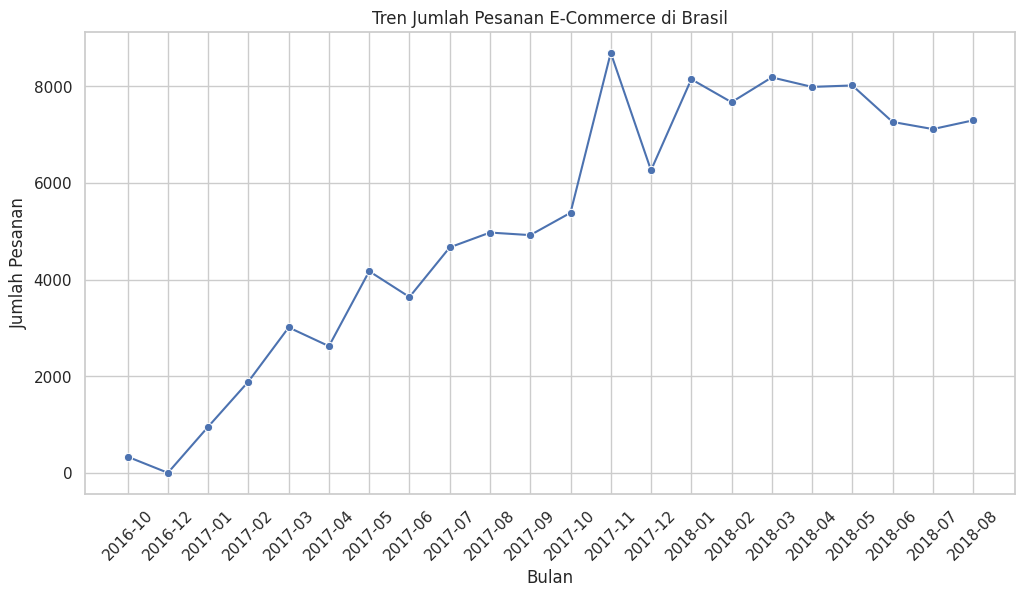

In [43]:
# Plot Tren Pesanan per bulan
plt.figure(figsize=(12, 6))
sns.lineplot(data=order_trend, x="order_month", y="order_count", marker="o", color="b")
plt.xticks(rotation=45)
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pesanan")
plt.title("Tren Jumlah Pesanan E-Commerce di Brasil")
plt.grid(True)
plt.show()

### 2. Analisis Hubungan antara Jumlah Pembayaran dan Rating Ulasan

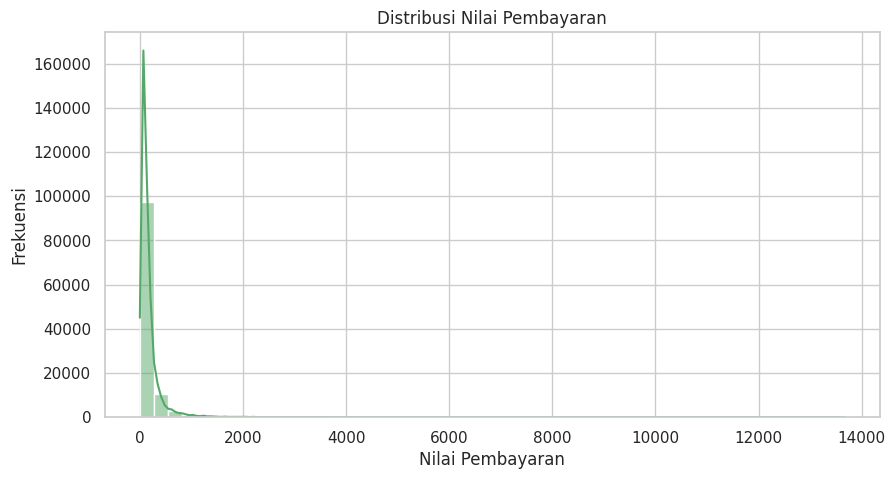

In [44]:
# Statistik ringkasan pembayaran
df["payment_value"].describe()

# Statistik review score
df["review_score"].value_counts(normalize=True) * 100

# Distribusi Nilai pembayaran
plt.figure(figsize=(10, 5))
sns.histplot(df["payment_value"], bins=50, kde=True, color="g")
plt.xlabel("Nilai Pembayaran")
plt.ylabel("Frekuensi")
plt.title("Distribusi Nilai Pembayaran")
plt.show()

<ipython-input-45-4e0d17ae0442>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  review_payment = df.groupby("review_score")["payment_value"].mean().reset_index()
<ipython-input-45-4e0d17ae0442>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=review_payment, x="review_score", y="payment_value", palette="coolwarm")


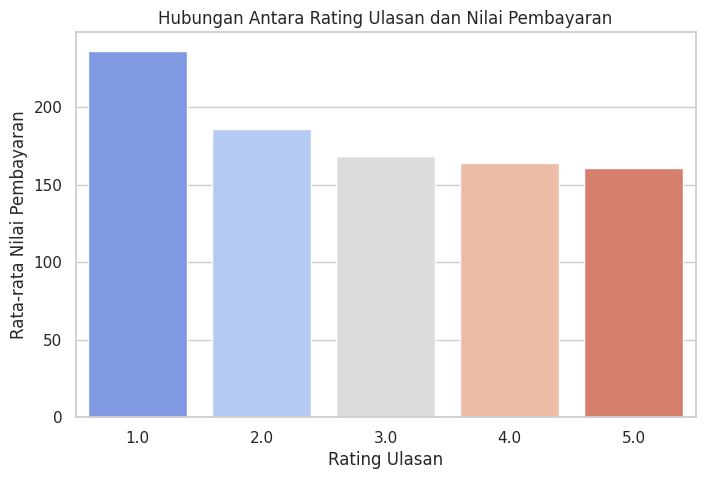

In [45]:
#Agregasi Data: Rata-rata Nilai Pembayaran per Skor Review
review_payment = df.groupby("review_score")["payment_value"].mean().reset_index()

# Rata-rata Nilai Pembayaran per Skor Review
plt.figure(figsize=(8, 5))
sns.barplot(data=review_payment, x="review_score", y="payment_value", palette="coolwarm")
plt.xlabel("Rating Ulasan")
plt.ylabel("Rata-rata Nilai Pembayaran")
plt.title("Hubungan Antara Rating Ulasan dan Nilai Pembayaran")
plt.show()

**Insight:**
  - **Distribusi Pesanan**  
    - Pesanan terjadi secara konsisten sepanjang waktu, tetapi ada variasi tertentu.
    - Bisa jadi ada pola musiman seperti kenaikan pesanan di akhir tahun.

  - **Statistik Pembayaran dan Review**  
    - Sebagian besar pembayaran berada di kisaran normal, tetapi ada beberapa transaksi dengan jumlah yang sangat tinggi.
    - Mayoritas pelanggan memberikan rating **5**, tetapi masih ada sebagian yang memberi rating rendah.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren volume pesanan e-commerce di Brasil berubah dari waktu ke waktu? apakah terdapat pola musiman?

<ipython-input-46-981f098166fc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=seasonality, x="month", y="avg_order_count", palette="Blues_r")


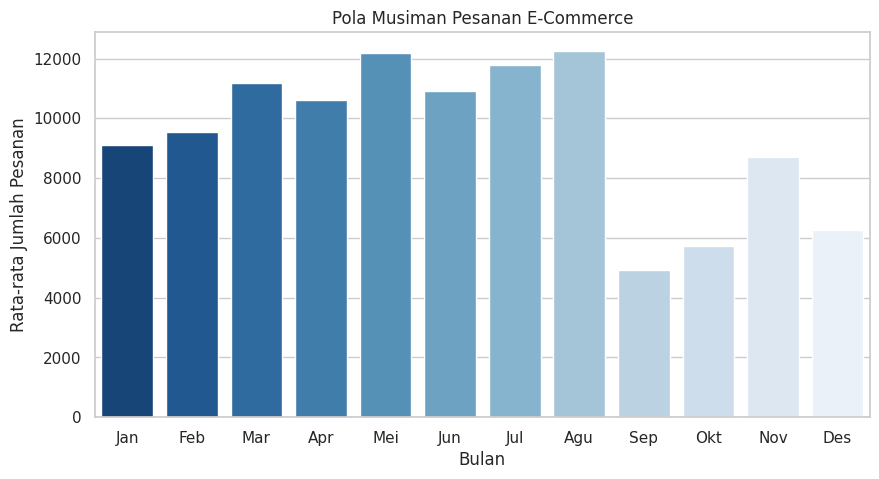

In [46]:
# Plot pola musiman
plt.figure(figsize=(10, 5))
sns.barplot(data=seasonality, x="month", y="avg_order_count", palette="Blues_r")
plt.xlabel("Bulan")
plt.ylabel("Rata-rata Jumlah Pesanan")
plt.title("Pola Musiman Pesanan E-Commerce")
plt.xticks(range(0, 12), ["Jan", "Feb", "Mar", "Apr", "Mei", "Jun", "Jul", "Agu", "Sep", "Okt", "Nov", "Des"])
plt.show()

### Pertanyaan 2:Apakah terdapat hubungan antara jumlah pembayaran dan rating ulasan pelanggan dalam e-commerce?

<ipython-input-47-79ec1afc4848>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="review_score", y="payment_value", palette="viridis")


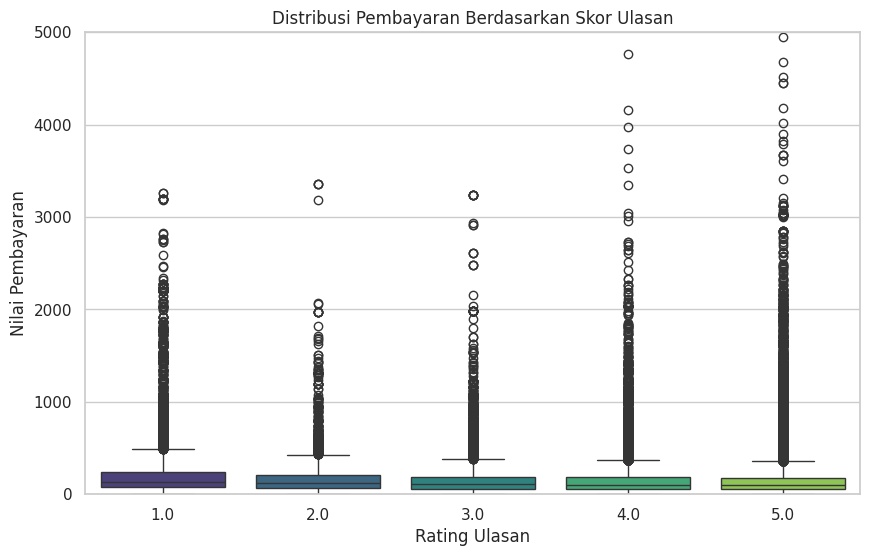

In [47]:
# Scatter Plot antara Nilai Pembayaran dan Rating Ulasan

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="review_score", y="payment_value", palette="viridis")
plt.ylim(0, 5000)  # Batasi untuk menghindari outlier ekstrem
plt.xlabel("Rating Ulasan")
plt.ylabel("Nilai Pembayaran")
plt.title("Distribusi Pembayaran Berdasarkan Skor Ulasan")
plt.show()

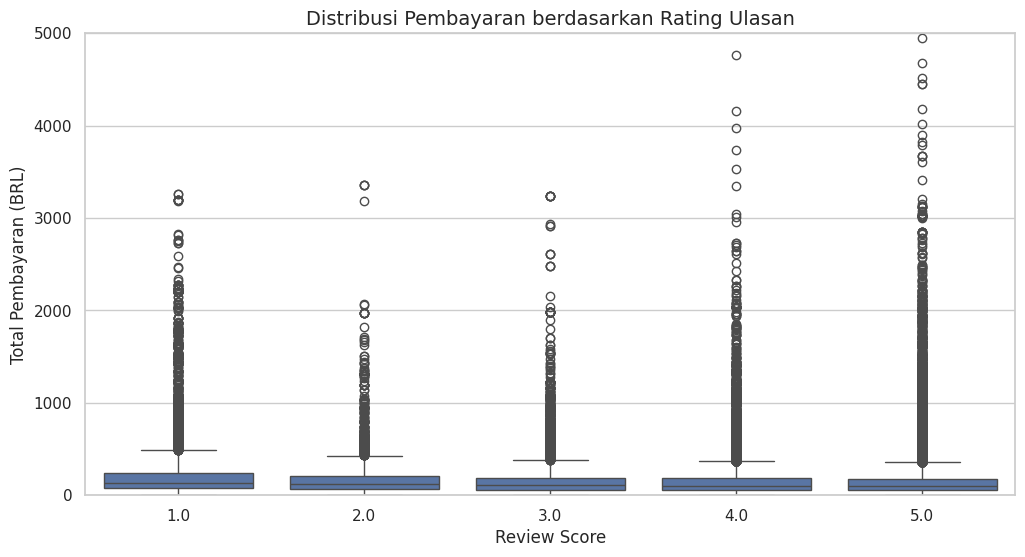

In [48]:
# Boxplot untuk melihat distribusi pembayaran pada tiap kategori review score
plt.figure(figsize=(12, 6))
sns.boxplot(x="review_score", y="payment_value", data=df)

plt.title("Distribusi Pembayaran berdasarkan Rating Ulasan", fontsize=14)
plt.xlabel("Review Score", fontsize=12)
plt.ylabel("Total Pembayaran (BRL)", fontsize=12)
plt.ylim(0, 5000)  # Batasi skala agar lebih informatif
plt.show()

**Insight:**
1.   Bagaimana tren volume pesanan e-commerce di Brasil berubah dari waktu ke waktu? apakah terdapat pola musiman?
 - Tren jumlah pesanan menunjukkan adanya **fluktuasi bulanan**.
 - Lonjakan pesanan terjadi pada bulan tertentu, kemungkinan karena promo atau event musiman.
 - Jika lonjakan ini berulang setiap tahun, ini bisa menjadi indikasi **pola musiman** yang dapat digunakan untuk strategi bisnis.
2.   Apakah terdapat hubungan antara jumlah pembayaran dan rating ulasan pelanggan dalam e-commerce?
 - **Scatter plot** menunjukkan tidak ada korelasi yang jelas antara jumlah pembayaran dan review score.
 - **Boxplot** memperlihatkan bahwa rata-rata pembayaran lebih tinggi untuk pelanggan dengan rating **5**, tetapi juga ada banyak pelanggan dengan rating rendah yang membayar cukup tinggi.
 - Ini menunjukkan bahwa nilai transaksi **tidak selalu menentukan kepuasan pelanggan**, sehingga faktor lain seperti layanan atau waktu pengiriman mungkin lebih berpengaruh.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion pertanyaan 1: Tren pesanan menunjukkan adanya fluktuasi bulanan dengan beberapa lonjakan signifikan. Kemungkinan terdapat pola musiman seperti peningkatan pesanan menjelang akhir tahun atau selama event promosi.
- Conclusion pertanyaan 2: Tidak ada korelasi yang jelas antara total pembayaran dan review score pelanggan. Meskipun pelanggan dengan rating 5 cenderung memiliki pembayaran lebih tinggi, masih ada pelanggan dengan rating rendah yang membayar dalam jumlah besar. Hal ini menunjukkan bahwa kepuasan pelanggan tidak hanya ditentukan oleh harga, tetapi juga oleh faktor lain seperti kualitas produk, layanan, dan waktu pengiriman.

In [49]:
df.to_csv("ecommerce_cleaned_data.csv", index=False)

from google.colab import files
files.download("ecommerce_cleaned_data.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>